## HADAMARD GATE

#### HADAMARD TRANSFORMATION

$  H := \frac{\sigma_{x}+ \sigma_{z}}{\sqrt{2}} $

$  HH^{\dagger} =  H^{\dagger}H = I \quad (Unitarity)$ 

$  H = H^{\dagger} \quad (Hermiticity) $

##### IN THE BASIS  $ \; \vert 0 \rangle ,\;  \vert 1 \rangle $

$ \sigma_{x} = $
$
\begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix} \quad
$
$ \sigma_{z} = $
$
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix} 
$


$\frac{\sigma_{x}+ \sigma_{z}}{\sqrt{2}} = $
$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix} +
$
$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix} =
$
$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$


**The matrix representation of the Hadamard gate in the standard basis**

$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$

#### APPLYING HADAMARD GATE

$\vert\Phi\rangle = \alpha_{ 0} \vert0\rangle + \alpha_{ 1}  \vert1\rangle $

$|\alpha_{ 0}|^2+|\alpha{ 1}|^2 = 1 $

$\vert 0 \rangle = $ 
$
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix} \quad
$
$\vert 1 \rangle = $ 
$
\begin{pmatrix}
0 \\
1 \\
\end{pmatrix}
$

<br />


$  H \vert 0 \rangle = \vert + \rangle = \frac{1}{\sqrt{2}} \vert0\rangle + \frac{1}{\sqrt{2}} \vert1\rangle = $
$
\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
1 \\
\end{pmatrix}
$


$  H \vert 1 \rangle = \vert - \rangle = \frac{1}{\sqrt{2}} \vert0\rangle - \frac{1}{\sqrt{2}} \vert1\rangle =$
$
\frac{1}{\sqrt{2}}\begin{pmatrix}
 1 \\
-1 \\
\end{pmatrix}
$

$  H \vert + \rangle = \vert 0 \rangle $

$  H \vert - \rangle = \vert 1 \rangle $

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram

from qiskit import IBMQ 
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### STATEVECTOR QISKIT SIMULATOR


-------- |0> ------------



<IPython.core.display.Latex object>


-------- H |0> ----------



<IPython.core.display.Latex object>


----- CIRCUIT H |0> -----



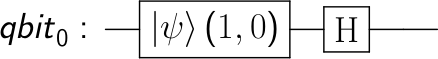

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.quantum_info import Statevector

qr = QuantumRegister(1, "qbit")
qc = QuantumCircuit(qr)

qc.initialize(Statevector.from_label('0'))

state0 = Statevector(qc)

#Hadamard Gate
qc.h(qr)

state1 = Statevector(qc)

print("\n-------- |0> ------------\n")
display(state0.draw('latex'))

print("\n-------- H |0> ----------\n")
display(state1.draw('latex'))

print("\n----- CIRCUIT H |0> -----\n")
display(qc.draw("latex"))


### IBM QPU

Least Busy: ibmq_santiago
Job Status: job has successfully run

--------------- |0> -----------------



<IPython.core.display.Latex object>


--------------- H |0> ---------------



<IPython.core.display.Latex object>


---- H |0> IBM QPU 1024 SHOTS -------

{'0': 504, '1': 520}


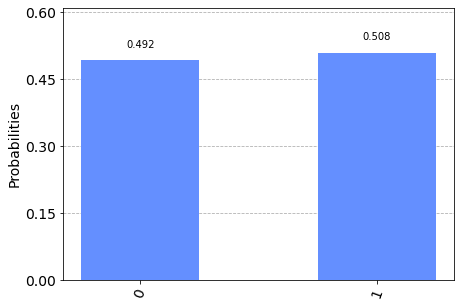

In [2]:
qr = QuantumRegister(1, "qbit")
cr = ClassicalRegister(1, "cbit")
qc = QuantumCircuit(qr, cr)

qc.initialize(Statevector.from_label('0'))

state0 = Statevector(qc)

#Hadamard Gate
qc.h(qr)

state1 = Statevector(qc)

qc.measure(qr, cr)

# IBM QPU
provider   = IBMQ.get_provider(hub = 'ibm-q')
least_busy = least_busy(provider.backends( 
    filters = lambda b: 
    b.configuration().n_qubits >= 2 and not 
    b.configuration().simulator and 
    b.status().operational == True))

print(f"Least Busy: {least_busy}")

executed = execute(qc, backend = least_busy)
job_monitor(executed, interval = 2)
result  = executed.result()
results_qpu = result.get_counts(qc)

print("\n--------------- |0> -----------------\n")
display(state0.draw('latex'))

print("\n--------------- H |0> ---------------\n")
display(state1.draw('latex'))

print("\n---- H |0> IBM QPU 1024 SHOTS -------\n")
plot_histogram(results_qpu)
print(results_qpu)